<a href="https://colab.research.google.com/github/RumyantsevaAlena/domashka_python/blob/main/%D0%94%D0%97_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [226]:
df = pd.read_csv('kc-house-data.csv', encoding='windows-1251')

In [227]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7.0,1180.0,0,1955,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7.0,2170.0,400,1951,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6.0,770.0,0,1933,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7.0,1050.0,910,1965,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8.0,1680.0,0,1987,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


#Задача 1

**Постройте график.
Назовите график.
Сделайте именование оси x и оси y.
Сделайте выводы.**

In [95]:
df = df.drop(df[df['yr_built'] == 6259].index)
df = df.drop(df[df['yr_built'] == 0].index)

In [163]:
df['yr_built'].value_counts()

2014    1004
2007     678
2006     663
2008     597
2005     586
        ... 
1933      37
1902      29
1901      29
1935      27
1934      22
Name: yr_built, Length: 116, dtype: int64

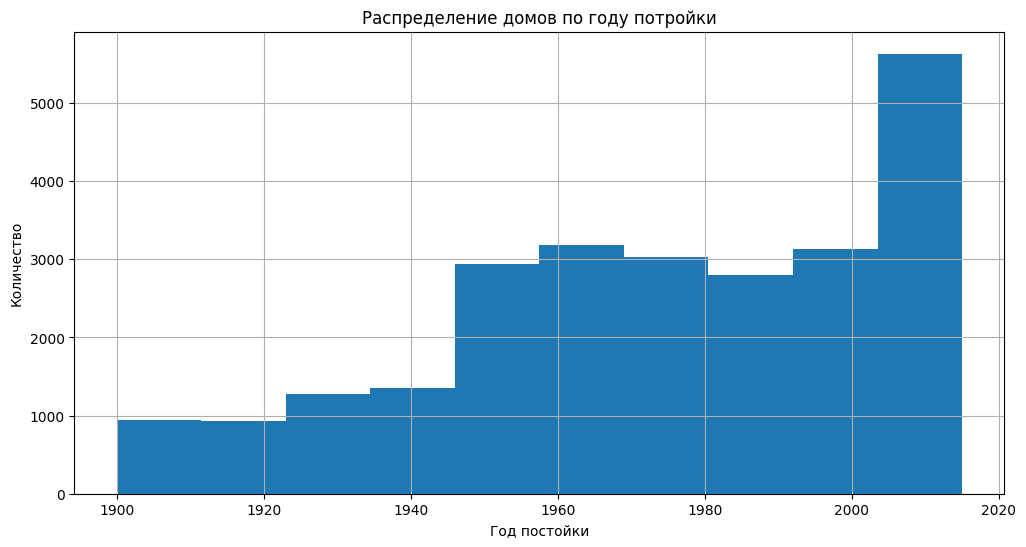

In [100]:
plt.figure(figsize=(12, 6))
plt.hist(df['yr_built'])
plt.title('Распределение домов по году потройки')
plt.xlabel('Год постойки')
plt.ylabel('Количество')
plt.grid();

*На данном графике видим каких годов постройки у нас преобладают в наличии. Старого фонда меньше всего*

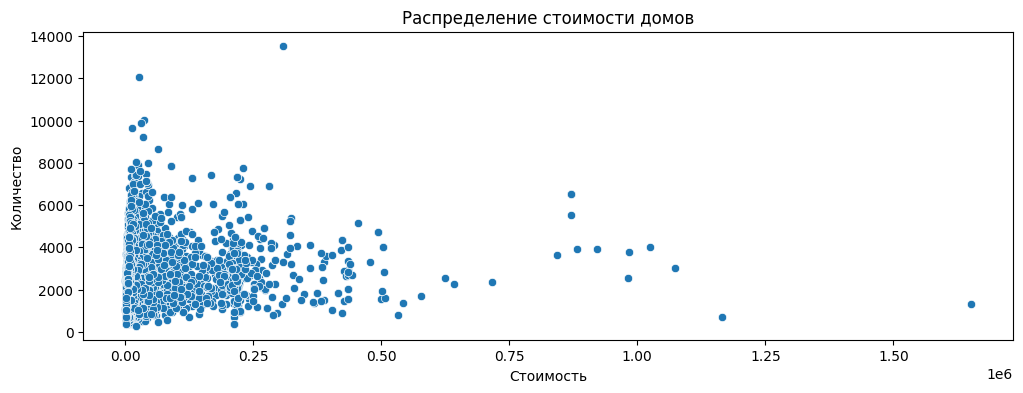

In [174]:
plt.figure(figsize=(12, 4))
sns.scatterplot(x=df['sqft_lot'], y=df['sqft_living'])
plt.title('Распределение стоимости домов')
plt.xlabel('Стоимость')
plt.ylabel('Количество');

**1.2. Изучите стоимости недвижимости**

In [162]:
df['price'].value_counts()

450000.0     203
550000.0     186
350000.0     186
425000.0     175
500000.0     172
            ... 
658600.0       1
691500.0       1
805500.0       1
627800.0       1
1444000.0      1
Name: price, Length: 4028, dtype: int64

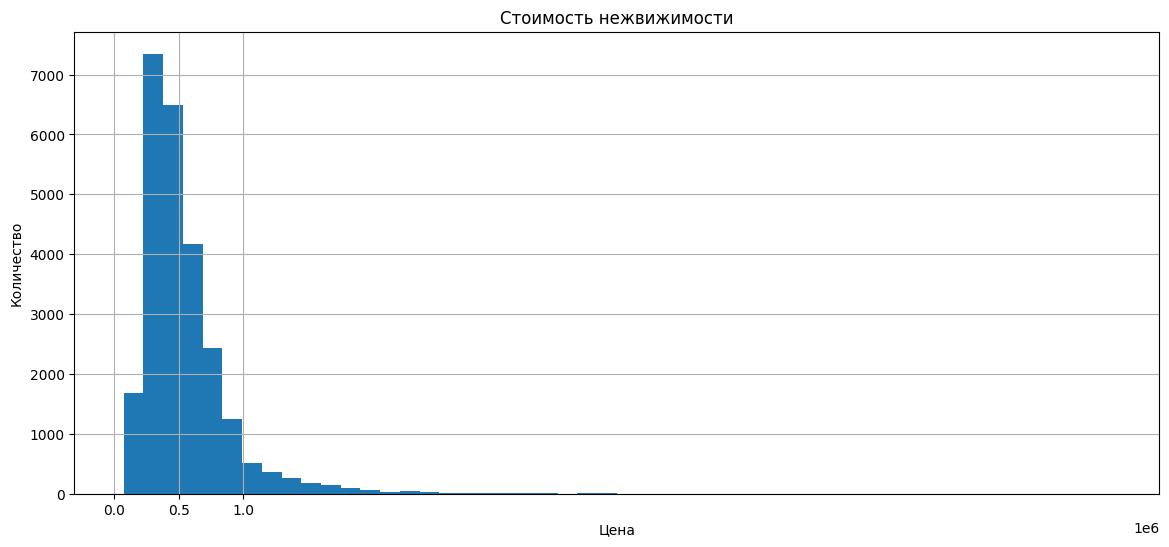

In [161]:
plt.figure(figsize=(14, 6))
plt.hist(df['price'], bins=50)
plt.title('Стоимость нежвижимости')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.xticks(range(0, 1444000, 500000))
plt.grid();

*На данном графике можем видеть что в основном у нас дома в ценовом диапазоне между 300000 - 550000 рублей. Больше миллиона домов очень мало*

**1.3. Изучите распределение квадратуры жилой**

In [166]:
doto= df['sqft_living'].value_counts()
doto

1300    163
1400    155
1660    154
1440    153
1800    150
       ... 
2803      1
3695      1
2518      1
5070      1
1802      1
Name: sqft_living, Length: 1038, dtype: int64

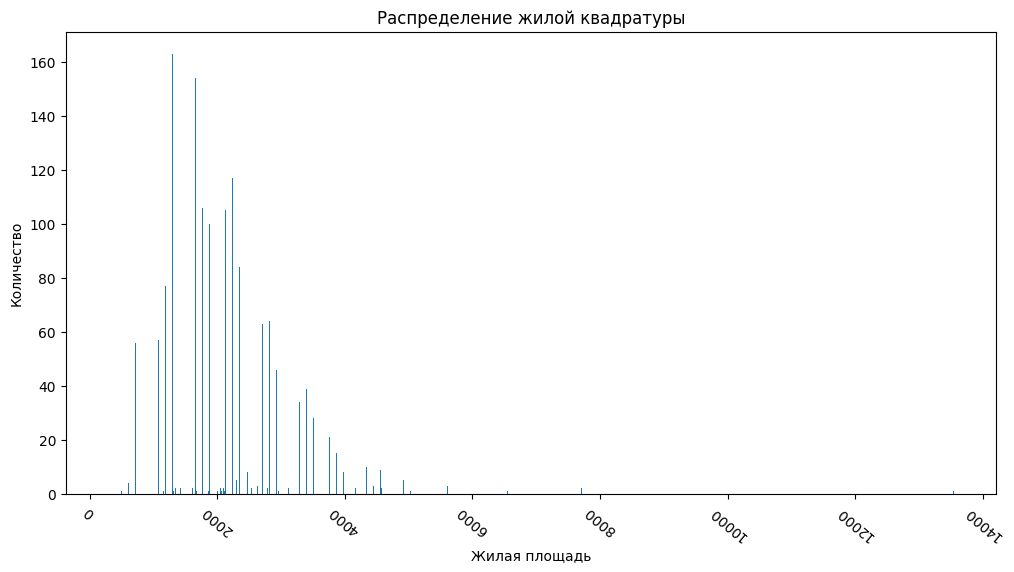

In [177]:
plt.figure(figsize=(12, 6))
plt.bar(doto.index, doto)
plt.title('Распределение жилой квадратуры')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество')
plt.xticks(rotation=500);

*В основном жилая площадь около 1000 кв метров. Имеется один дом с наибольшей площадью около 13500 кв метров.*

**1.4. Изучите распределение года постройки**

In [189]:
data = df.groupby('yr_built')['id'].agg(count = 'count').sort_values(by='yr_built')
data.head(15)

,count
yr_built,
1900,96
1901,29
1902,29
1903,53
1904,50
1905,81
1906,100
1907,72
1908,90


In [178]:
df['yr_built'].value_counts()

2014    1004
2007     678
2006     663
2008     597
2005     586
        ... 
1933      37
1902      29
1901      29
1935      27
1934      22
Name: yr_built, Length: 116, dtype: int64

#2 задача
**2.1. Изучите распределение домов от наличия вида на набережную**
Постройте график
Сделайте выводы

In [191]:
data = df['waterfront'].value_counts()
data

0    25023
1      185
Name: waterfront, dtype: int64

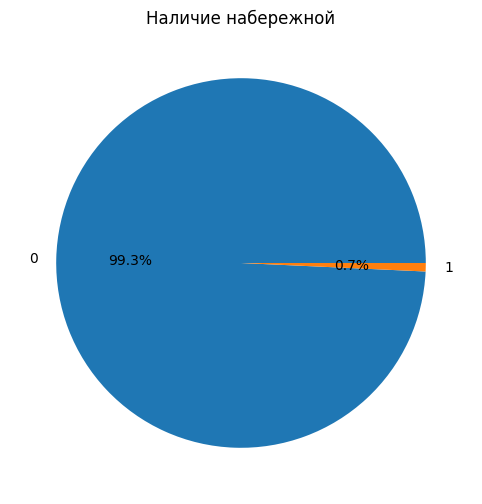

In [192]:
plt.figure(figsize=(8, 6))
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title('Наличие набережной');

*Лишь у 0,7% имеется вид на набережную*

**2.2. Изучите распределение этажей домов**

In [193]:
data = df['floors'].value_counts()
data

1.0    11654
2.0    10313
1.5     2091
3.0      933
2.5      206
3.5       11
Name: floors, dtype: int64

Text(0.5, 1.0, 'Распределение этажей')

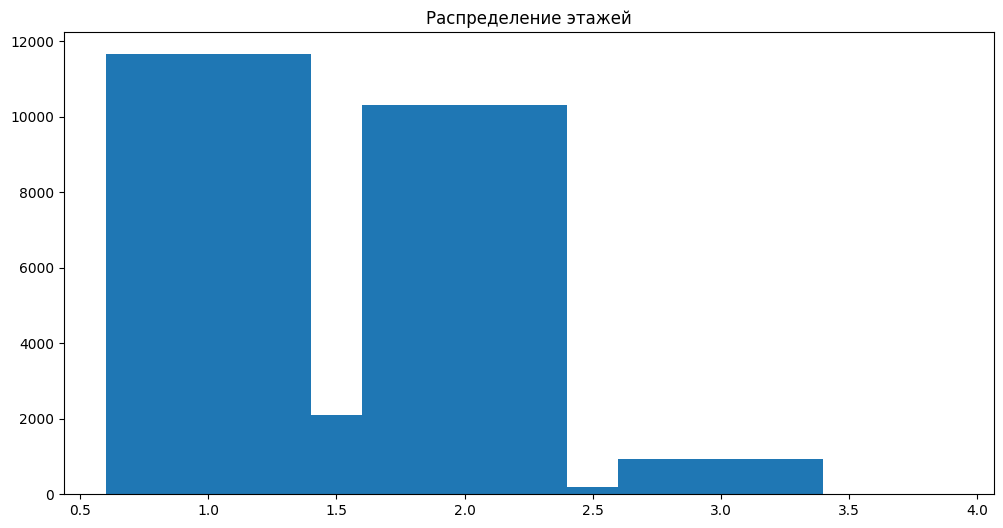

In [205]:
plt.figure(figsize=(12, 6))
plt.bar(data.index, data)
plt.title('Распределение этажей')


*В основном в домах 1 и 2 этажа.*

**2.3. Изучите распределение состояния домов**

In [206]:
data = df['condition'].value_counts()
data

3    16973
4     6157
5     1858
2      186
1       34
Name: condition, dtype: int64

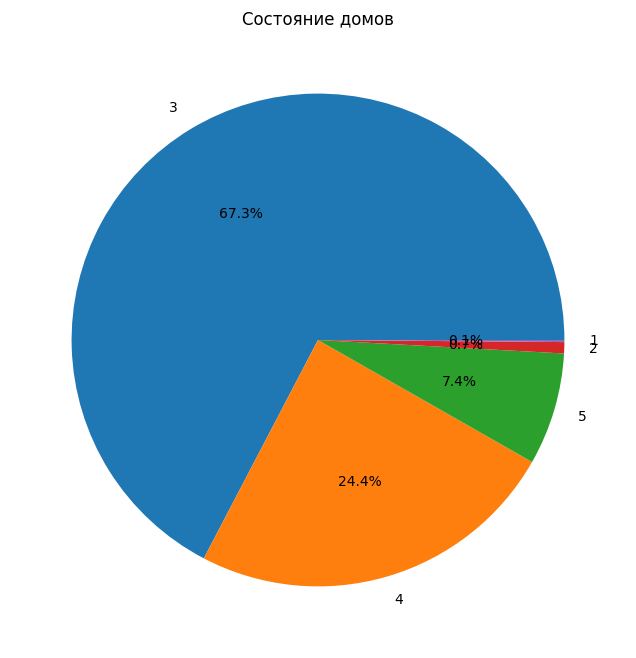

In [210]:
plt.figure(figsize=(12, 8))
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title('Состояние домов');

*В основном у домов среднее состояние с оценкой 4 и 3*

#3 задача
**Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.**

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [228]:
data = pd.crosstab(df['condition'], df['view'])
data

view,0,1,2,3,4
condition,,,,,
1,31,1,0,0,2
2,180,1,3,2,0
3,15494,228,683,366,202
4,5479,114,292,165,107
5,1608,36,113,53,48
7,0,0,0,1,0
98030,1,0,0,0,0


<Axes: xlabel='view', ylabel='condition'>

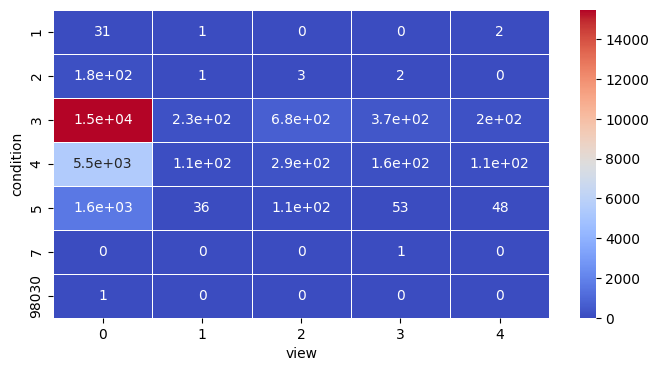

In [229]:
plt.figure(figsize=(8, 4))
sns.heatmap(data, annot=True, linewidths=.5, cmap='coolwarm')

*Из данного графика видим что вид из дома не влияет никаким образом на его состояние*